In [1]:
import pandas as pd

train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

print(train.head())
print(test.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [2]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Columns:", train.columns.tolist())

print(train.info())

print(train.describe(include='all'))  # 'all' shows categorical stats too

print(train.isnull().sum())


Train shape: (891, 12)
Test shape: (418, 11)
Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
        PassengerId    Survived      Pclass                     Name

In [3]:
print(train['Survived'].value_counts())

print(train['Sex'].value_counts())
print(train['Embarked'].value_counts())

print(train[['Age', 'Fare']].describe())


Survived
0    549
1    342
Name: count, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
              Age        Fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200


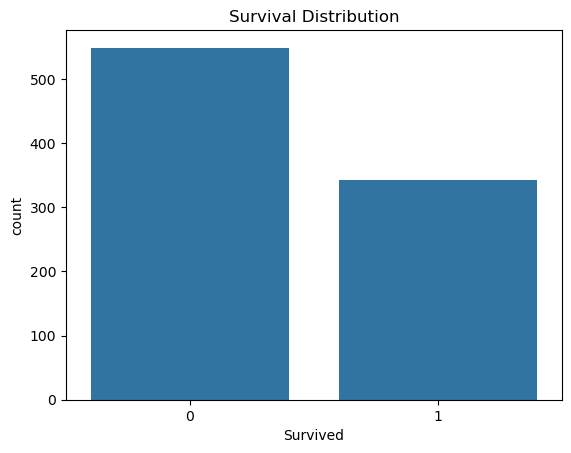

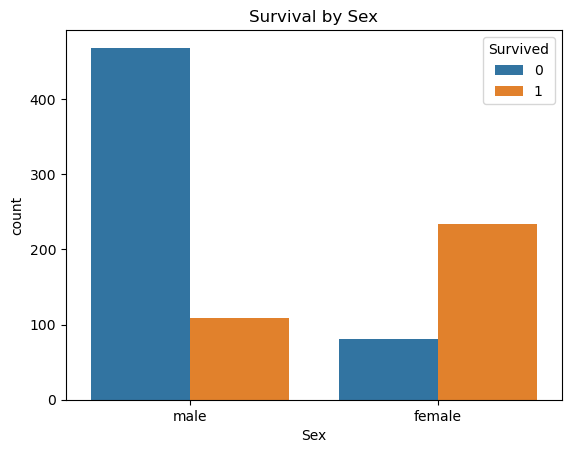

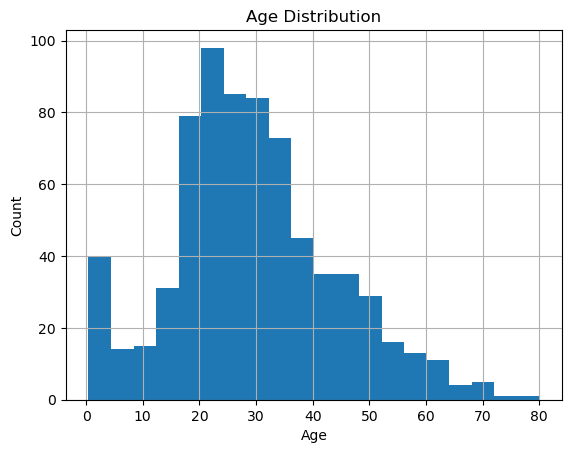

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Survived', data=train)
plt.title("Survival Distribution")
plt.show()

sns.countplot(x='Sex', hue='Survived', data=train)
plt.title("Survival by Sex")
plt.show()

train['Age'].hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()


In [5]:
print(train['Age'].isnull().mean() * 100)

19.865319865319865


In [6]:
print(train.groupby("Pclass")["Fare"].mean())

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


In [7]:
print(train.groupby(['Sex', 'Survived']).size())

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64


In [8]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
train['Age'].fillna(train['Age'].median(), inplace=True)


/var/folders/94/xy99chk17179bk_tsx3sxvhm0000gn/T/ipykernel_2614/4138798854.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)


In [10]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)


/var/folders/94/xy99chk17179bk_tsx3sxvhm0000gn/T/ipykernel_2614/4055762640.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)


In [11]:
print(train.columns.tolist())


['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [12]:
train.drop('Cabin', axis=1, inplace=True, errors='ignore')

In [13]:
print(train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [14]:
train['Sex']=train['Sex'].map({'male':0, 'female':1})
train['Embarked'] = train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [15]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

In [16]:
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)

In [17]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print(train['Title'].value_counts())


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


In [18]:
rare_titles = ['Don', 'Rev', 'Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess',
               'Jonkheer', 'Dona', 'Mme', 'Ms', 'Mlle', 'the Countess']
train['Title'] = train['Title'].replace(rare_titles, 'Other')

title_map = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Other': 4}
train['Title'] = train['Title'].map(title_map)


In [19]:
columns_to_drop = ['PassengerId', 'Name', 'Ticket']
train.drop(columns_to_drop, axis=1, inplace=True)


In [20]:
print(train.head())
print(train.info())


   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  FamilySize  \
0         0       3    0  22.0      1      0   7.2500         2           2   
1         1       1    1  38.0      1      0  71.2833         0           2   
2         1       3    1  26.0      0      0   7.9250         2           1   
3         1       1    1  35.0      1      0  53.1000         2           2   
4         0       3    0  35.0      0      0   8.0500         2           1   

   IsAlone  Title  
0        0      0  
1        0      2  
2        1      1  
3        0      2  
4        1      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch   

In [21]:
X = train.drop('Survived', axis=1)
y = train['Survived']


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [24]:
from sklearn.metrics import accuracy_score

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))


Training Accuracy: 0.8202247191011236
Validation Accuracy: 0.7877094972067039


In [25]:
test_clean = test.copy()
test_clean['Age'] = test_clean['Age'].fillna(train['Age'].median())
test_clean['Embarked'] = test_clean['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test_clean['Sex'] = test_clean['Sex'].map({'male': 0, 'female': 1})
test_clean['Embarked'] = test_clean['Embarked'].fillna(train['Embarked'].mode())
test_clean['FamilySize'] = test_clean['SibSp'] + test_clean['Parch'] + 1
test_clean['IsAlone'] = (test_clean['FamilySize'] == 1).astype(int)
test_clean['Title'] = test_clean['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
rare_titles = ['Don', 'Rev', 'Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess','Jonkheer', 'Dona', 'Mme', 'Ms', 'Mlle', 'the Countess']
test_clean['Title'] = test_clean['Title'].replace(rare_titles, 'Other')
title_map = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Other': 4}
test_clean['Title'] = test_clean['Title'].map(title_map)
test_clean = test_clean.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [26]:
print(X.columns.tolist())
print(test_clean.columns.tolist())


['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title']
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'IsAlone', 'Title']


In [27]:
test_clean = test_clean[X.columns]
test_clean['Fare'] = test_clean['Fare'].fillna(train['Fare'].median())

In [28]:
test_pred = model.predict(test_clean)


In [29]:
print(test_clean.isnull().sum())


Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
Title         0
dtype: int64


In [30]:
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': test_pred
})
submission.to_csv('submission.csv', index=False)


In [31]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_val_pred = dt_model.predict(X_val)


In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_val_pred = rf_model.predict(X_val)


In [33]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_val_pred = gb_model.predict(X_val)
